# ชุดข้อมูลรูปภาพตัวเลขอารบิกที่เขียนด้วยลายมือ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import *

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization , Activation
from tensorflow.keras.datasets import mnist

#### แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

#### แปลงขนาดรูปภาพให้อยู่ในมิติ (จำนวนรูป , กว้าง , ยาว , สี) ชนิด float

In [4]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')

#### normalize

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### ตัวอย่างรูปภาพ

Text(0.5, 1.0, '5')

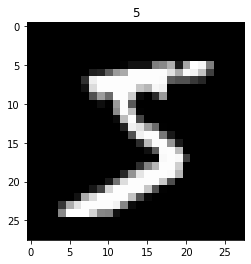

In [6]:
plt.imshow(x_train[0] , cmap='gray')
plt.title(y_train[0])

## Modeling

In [7]:
class modelconvo(tf.keras.Model) :
    
    def __init__(self):
        super(modelconvo , self).__init__() 
        
        self.layer1 = Conv2D(20 , kernel_size=(3,3) , activation='relu')
        self.layer2 = MaxPooling2D(pool_size=(2,2))
        
        self.layer3 = Conv2D(20 , kernel_size=(3,3) , activation='relu')
        self.layer4 = MaxPooling2D(pool_size=(2,2))        

        self.layer5 = Flatten()
        
        self.layer6 = Dense(20 , activation='relu')
        self.layer7 = Dropout(0.25)
            
        self.classifier = Dense(10 , activation='softmax')

    
    def call(self , x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
    
        
        return  self.classifier(x)
        
        

In [8]:
model  =modelconvo()

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
his_model = model.fit(x_train , y_train , verbose=1 , 
          epochs=10 ,batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 17s 44ms/step - loss: 0.8020 - accuracy: 0.7334 - val_loss: 0.1905 - val_accuracy: 0.9481
Epoch 2/10
375/375 [==============================] - 16s 43ms/step - loss: 0.3547 - accuracy: 0.8840 - val_loss: 0.1213 - val_accuracy: 0.9647
Epoch 3/10
375/375 [==============================] - 17s 46ms/step - loss: 0.2750 - accuracy: 0.9103 - val_loss: 0.1154 - val_accuracy: 0.9669
Epoch 4/10
375/375 [==============================] - 17s 44ms/step - loss: 0.2253 - accuracy: 0.9261 - val_loss: 0.0788 - val_accuracy: 0.9768
Epoch 5/10
375/375 [==============================] - 18s 48ms/step - loss: 0.1958 - accuracy: 0.9349 - val_loss: 0.0695 - val_accuracy: 0.9795
Epoch 6/10
375/375 [==============================] - 18s 49ms/step - loss: 0.1727 - accuracy: 0.9442 - val_loss: 0.0642 - val_accuracy: 0.9810
Epoch 7/10
375/375 [==============================] - 19s 52ms/step - loss: 0.1605 - accuracy: 0.9482 - val_loss: 0.0614 - val_accuracy:

In [11]:
model.summary()

Model: "modelconvo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  3620      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  10020     
_________________________________________________________________
dropout (Dropout)            multiple                  0

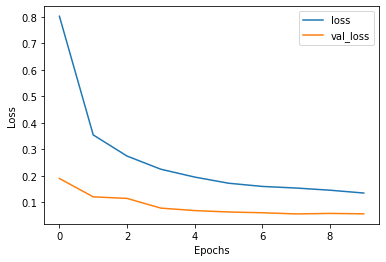

In [12]:
plt.plot(his_model.history['loss'] , label='loss')
plt.plot(his_model.history['val_loss'] , label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

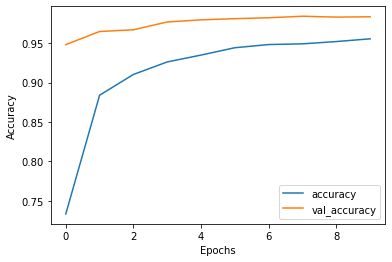

In [13]:
plt.plot(his_model.history['accuracy'] , label='accuracy')
plt.plot(his_model.history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Model Evaluation

In [14]:
model.evaluate(x_test , y_test , verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0511 - accuracy: 0.9836


[0.051146745681762695, 0.9836000204086304]

In [15]:
predict_x = model.predict(x_test)
class_x = np.argmax(predict_x , axis=1)

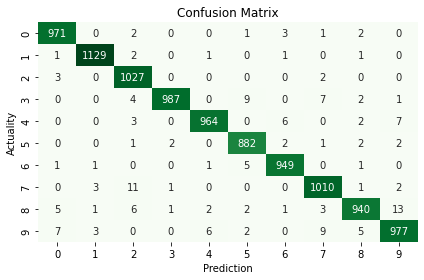

In [16]:
sns.heatmap(confusion_matrix(y_test , class_x) , annot=True , fmt='.0f' , cmap='Greens' , cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Actuality')
plt.title('Confusion Matrix')
plt.tight_layout()

In [17]:
df = pd.DataFrame([class_x , y_test]).T
df.rename(columns={0:'pred' , 1:'test'} , inplace=True)

In [18]:
num = []
for i in range(len(df)):
    if df['pred'][i] != df['test'][i] :
        num.append(df.index[i])

In [19]:
num_10 = num[:10]

#### 10 ตัวอย่าง เลขลายมือเขียนที่ทำนายผิด

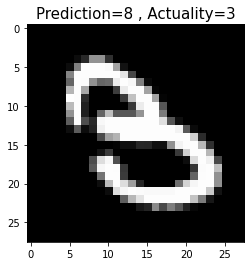

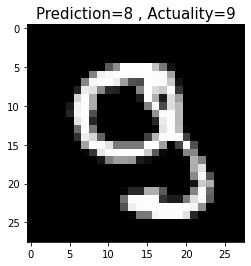

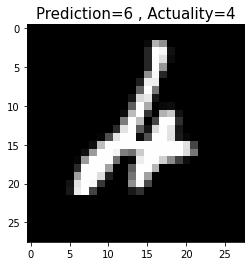

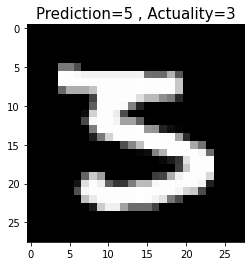

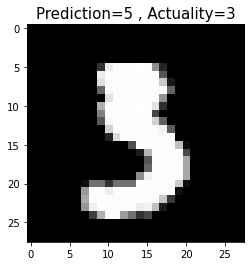

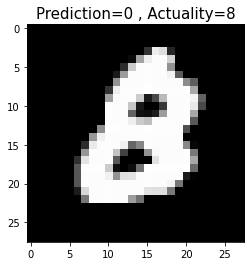

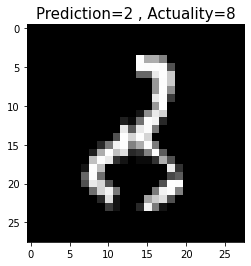

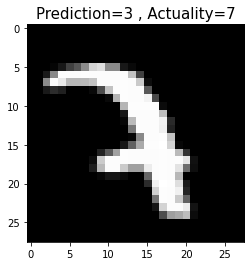

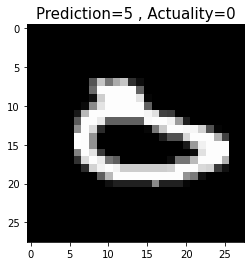

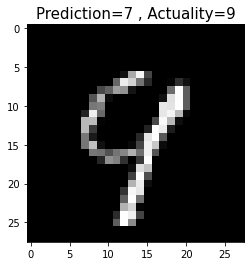

In [23]:
for i , index in enumerate(num_10) :
    plt.imshow(x_test[index] , cmap='gray' )
    plt.title(f'Prediction={class_x[index]} , Actuality={y_test[index]}' , fontsize=15)
    plt.show()
